# Exercise 3.1: Diffusion, Entropy and the Arrow of Time

The goal of this exercise is to simulate (in 2D), the diffusion of a square drop of cream in a square cup of coffee via a random walk approach. 

You will need to consider $N$ particles executing a random walk on a 2D square lattice (sides at $x=\pm 100$, $y=\pm 100$), allowing multiple occupancy for a lattice site.  

You should assume that there are walls at $x=\pm 100$, $y=\pm 100$. 

(a) Start by modifying the ```Walker``` class given during the lectures to only allow motion *ONLY along a 2D grid* (i.e. only integer movements are allowed on a grid). You will also need to consider the special case of reaching the walls of the cup. 

Create a ```position()``` function as a member of this class that tells you where the grid walker is on the 2D grid (i.e. its current coordinates). 


In [1]:
import random
import math 
import numpy as np


class GridWalker:
    """A random walker class for walkers on a grid"""
    # instantiations of this class are initialized with an initial position and the limits within which they will be able to move
    def __init__(self, initialx, initialy, limitx, limity):
        # only accept positive or negative integers as initial positions for the grid walker
        if isinstance(initialx, int) is False or isinstance(initialy, int) is False:
            raise Exception('Wakers have to be initialized with integer positions')
        # initialize the x and y positions:
        self.x = initialx
        self.y = initialy
        # set the limits of the 2D surface they are in on a square:
        self.limitsx = [-limitx, limitx]
        self.limitsy = [-limity, limity]
        # keep the initial positions:
        self.xinit = initialx
        self.yinit = initialy
        # keep all the positions that the walker has moved through in a list:
        self.allx = []
        self.ally = []
        self.allx.append(initialx)
        self.ally.append(initialy)

    # now let's create a function that allows us to take random steps in a random direction on theg rid:
    def move(self):
        # add the four directions randomly
        directions = [ [0,1], [1,0], [-1,0], [0,-1]]
        # choose one of the four directions randomly:
        random_direction = random.randint(0,3)
        # add these to the current position (trial in case we have reached the edges):
        x_trial = self.x + directions[random_direction][0]
        y_trial = self.y + directions[random_direction][1]
        while x_trial < self.limitsx[0] or x_trial > self.limitsx[1] or y_trial < self.limitsy[0] or y_trial > self.limitsy[1]:
            # choose one of the four directions randomly:
            random_direction = random.randint(0,3)
            x_trial = self.x + directions[random_direction][0]
            y_trial = self.y + directions[random_direction][1]
        # add these to the current position in case we have reached this point:
        self.x = self.x + directions[random_direction][0]
        self.y = self.y + directions[random_direction][1]
        self.allx.append(self.x)
        self.ally.append(self.y)
        
    # get the current position
    def position(self):
        return self.x, self.y




Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Test the GridWalker class here: 
gridWalker1 = GridWalker(0,0, 100, 100)
gridWalker1.move()
print(gridWalker1.position())

(0, -1)


(b) Next, use the matplotlib animation given in the lectures to construct an animation of the evolution of $N=400$ walkers for $n=10^4$ steps, initially distributed randomly within a square defined by $x=\pm 20$ and $y=\pm 20$. 

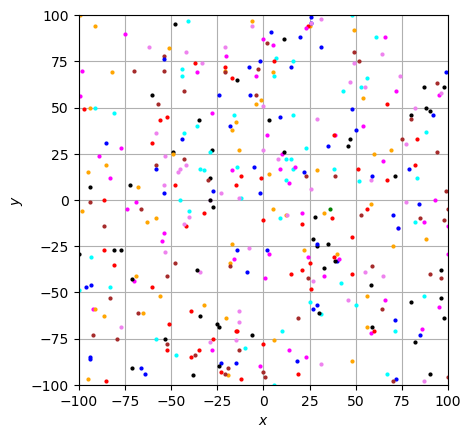

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:21<00:00, 470.72it/s]


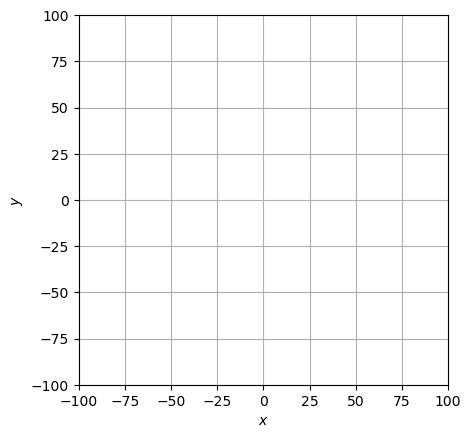

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time # various time functions
from tqdm import tqdm # progress bar
import matplotlib.ticker as ticker # 

# this allows us to access dynamic updating of the plot: 
from IPython import display

# setup the axis:
fig,ax = plt.subplots(1,1)

#get the dynamic display:
dynamicdisplay = display.display("", display_id=True)

# put a grid on the graph:
ax.grid(True, which='both')

# set the aspect ratio to 1:
ax.set_aspect(1)

# set some parameters here:
n = 400 # the number of walkers
N = int(1E4) # the number of steps
Nupdate = 100 # the frequency of steps used to update the plot

# set the labels and limits:
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
limitsize = 100
ax.set_xlim(-limitsize,limitsize)
ax.set_ylim(-limitsize,limitsize)

# set the major ticks to correspond to twice step size:
ax.xaxis.set_major_locator(ticker.MultipleLocator(limitsize/4))
ax.yaxis.set_major_locator(ticker.MultipleLocator(limitsize/4))

# initialize n walkers and put them in a list:
WalkerList = []
WalkerColor = [] # create a list with the colors of each walker 
colors = [ 'green', 'orange', 'red', 'magenta', 'blue', 'cyan', 'black', 'brown', 'violet'] # 9 colours
j = 0 # counter to make sure we don't go over the 9 colors
for w in range(n): 
    WalkerList.append(GridWalker(random.randint(-20,20),random.randint(-20,20), limitsize, limitsize))
    # set the color of each walker. If we w exceeds 8 then reset the counter j:
    if w-8*j > 8:
        j = j + 1
    else: 
        pass 
    WalkerColor.append(colors[w-8*j])

# now go through all the n walkers and get them to perform N steps
for i in tqdm(range(N)):
    # go through all the walkers in the WalkerList
    for j, walker in enumerate(WalkerList):
        # move them one step in a random direction
        walker.move()

    if i%Nupdate==0: # only update every Nupdate steps
        # plot them!
        # the list will contain the points so we can remove them later:
        walkers_plot = []
        for j, walker in enumerate(WalkerList):
            walkers_plot.append(ax.plot(walker.position()[0], walker.position()[1], marker='o',color=WalkerColor[j], ls='-', markersize=2))
        dynamicdisplay.update(fig) # update the figure in the notebook
        # remove the walkers from display for next run:
        for j, walker in enumerate(WalkerList):
            wmarker = walkers_plot[j].pop(0)
            wmarker.remove()
        #time.sleep(0.1) # "sleep" for half a second to allow us to see the evolution


(c) Now write a function that calculates the *entropy* of a walker given the list of walkers, the grid size and the limits of the cup. 

Use the given ```logfact()``` function below to calculate logarithms of exponentials. This uses Stirling's approximation where appropriate. 

In [7]:
from scipy.special import factorial

# return the Log of a factorial, use Stirling's approximation if x is too large
# taken from https://www.ippp.dur.ac.uk/~krauss/Lectures/NumericalMethods/RandomWalks/Code/Walker.py
def logfact(x):
    if x <= 120:
        return np.log(factorial(x))
    else:
        return 0.5*np.log(2.0*np.pi*x) + x*np.log(x) - x

# a function that calculates the entropy for a given Walker configuration for a given grid size
# "WalkerList" is a list of Walkers
def Entropy(WalkerList, GridSize, LimitSize):
    """Calculates the entropy for a given grid size: GridSize x GridSize over a box of LimitSize"""
    # initialize the Grid 2D numpy array with zero occupancy (easiest way to do this) 
    Grid = np.zeros((GridSize, GridSize))
    # loop over the walkers and figure out which partition each lies in
    # increment the Grid list accordingly
    for k, walker in enumerate(WalkerList):
        # get the walker position
        wposition = walker.position()
        # figure out where this lies on the grid
        for i in range(GridSize):
            if wposition[0] >= (i * 2*LimitSize/GridSize - LimitSize) and wposition[0] <= ((i+1) * 2*LimitSize/GridSize - LimitSize):
                grid_x = i
            if wposition[1] >= (i * 2*LimitSize/GridSize - LimitSize) and wposition[1] <= ((i+1) * 2*LimitSize/GridSize - LimitSize):
                grid_y = i
        # add a walker to the Grid:
        Grid[grid_x][grid_y] = Grid[grid_x][grid_y] + 1    
    # Loop over filled grid partitions and calculate the entropy:  
    NW = len(WalkerList)
    S = logfact(NW) #Use Stirling's approximation here
    for l in range(GridSize):
        for m in range(GridSize):
            Pi = logfact(int(Grid[l][m])) #Use Stirling's approximation here
            S = S - Pi
    # return the entropy:
    return S

In [8]:
# Test the entropy function here: 
gridWalkers = []
gridWalkers.append(gridWalker1)
Entropy(gridWalkers, 8, 100)

0.0

(d) Perform the pseudo-experiment without visualization to calculate the entropy as a function of $N$:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time # various time functions
from tqdm import tqdm # progress bar

# set some parameters here:
n = 400 # the number of walkers
N = int(1E4) # the number of steps
Nupdate = 100 # the frequency of steps used to update the plot
EntropyGrid = 20 # the size of the grid used to calculate the entropy

# set limits:
limitsize = 100

# initialize n walkers and put them in a list:
WalkerList = []
for w in range(n): 
    WalkerList.append(GridWalker(random.randint(-20,20),random.randint(-20,20), limitsize, limitsize))

# Grid to save the entropy after N steps:
EntropyN = []
# now go through all the n walkers and get them to perform N steps
for i in tqdm(range(N)):
    # go through all the walkers in the WalkerList
    for j, walker in enumerate(WalkerList):
        # move them one step in a random direction
        walker.move()
    # calculate the entropy and save it:
    EntropyN.append(Entropy(WalkerList, EntropyGrid, limitsize))


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:51<00:00, 193.45it/s]


(e) Plot the entropy as a function of the number of steps. 

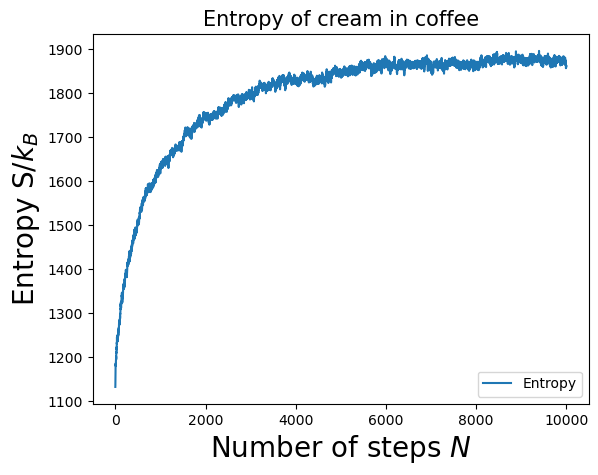

In [11]:
# Plot the entropy:
import matplotlib.pyplot as plt
import math

# first, create a list for N:
Nlist = [x for x in range(N)]

# setup the axis:
fig,ax = plt.subplots(1,1)

# set the labels and titles:
ax.set_xlabel(r'Number of steps $N$', fontsize=20) # set the x label
ax.set_ylabel(r'Entropy S/$k_B$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Entropy of cream in coffee' , fontsize=15) # set the title 

# plot the Entropy
ax.plot(Nlist, EntropyN, ls='-', label='Entropy')

# construct the legend:
ax.legend(loc='lower right')  # Add a legend

plt.show() # show the plot here


(f) BONUS: Plot the density (walkers per bin) in one dimension for $N=0, 250, 1000, 2000, 10000$ steps. Start with the same initial conditions as before. You may use more walkers to approximate the density. 

In [12]:
# function to calculate the density of walkers on a grid. Use the same grid as for the entropy.
def Density(WalkerList, GridSize, LimitSize):
    """Calculates the density in one dimension on a grid of GridSize x GridSize over a box of LimitSize"""
    # initialize the a 1D numpy array with zero occupancy
    density = np.zeros(GridSize)
    # initialize the Grid 2D numpy array with zero occupancy
    Grid = np.zeros((GridSize, GridSize))
    # loop over the walkers and figure out which partition each lies in
    # increment the Grid list accordingly
    for k, walker in enumerate(WalkerList):
        # get the walker position
        wposition = walker.position()
        # figure out where this lies on the grid
        for i in range(GridSize):
            if wposition[0] >= (i * 2*LimitSize/GridSize - LimitSize) and wposition[0] <= ((i+1) * 2*LimitSize/GridSize - LimitSize):
                grid_x = i
            if wposition[1] >= (i * 2*LimitSize/GridSize - LimitSize) and wposition[1] <= ((i+1) * 2*LimitSize/GridSize - LimitSize):
                grid_y = i
        # add a walker to the Grid:
        Grid[grid_x][grid_y] = Grid[grid_x][grid_y] + 1    
    # now sum over one of the dimensions:
    density = np.sum(Grid,axis=0)
    return density

In [13]:
# now calculate the density at $N=0, 250, 1000, 2000, 10000$ steps.

import numpy as np
import matplotlib.pyplot as plt
import time # various time functions
from tqdm import tqdm # progress bar

# set some parameters here:
n = 10000 # the number of walkers
N = int(1E4) # the number of steps
EntropyGrid = 20 # the size of the grid used to calculate the entropy

# set limits:
limitsize = 100

# initialize n walkers and put them in a list:
WalkerList = []
for w in range(n): 
    WalkerList.append(GridWalker(random.randint(-20,20),random.randint(-20,20), limitsize, limitsize))

# Grid to save the density after N steps:
DensityN = []
# now go through all the n walkers and get them to perform N steps
for i in tqdm(range(N)):
    # go through all the walkers in the WalkerList
    for j, walker in enumerate(WalkerList):
        # move them one step in a random direction
        walker.move()
    # calculate the density and save it:
    if i==0 or i==249 or i==999 or i==1999 or i==9999:
        DensityN.append(Density(WalkerList, EntropyGrid, limitsize))


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:52<00:00, 88.78it/s]


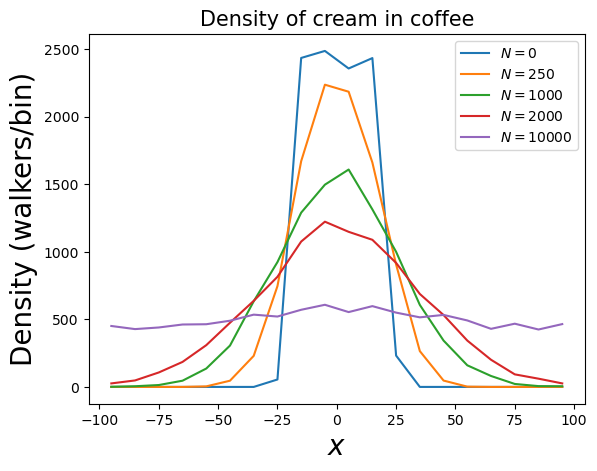

In [14]:
import matplotlib.pyplot as plt
import math

# first, create a list for N:
xlist = [((x+0.5) * 2*limitsize/EntropyGrid - limitsize) for x in range(EntropyGrid)]

# setup the axis:
fig,ax = plt.subplots(1,1)

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'Density (walkers/bin)', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Density of cream in coffee' , fontsize=15) # set the title 

# plot the Entropy
ax.plot(xlist, DensityN[0], ls='-', label='$N=0$')
ax.plot(xlist, DensityN[1], ls='-', label='$N=250$')
ax.plot(xlist, DensityN[2], ls='-', label='$N=1000$')
ax.plot(xlist, DensityN[3], ls='-', label='$N=2000$')
ax.plot(xlist, DensityN[4], ls='-', label='$N=10000$')

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here